In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mode
from sklearn.cross_validation import train_test_split
sns.set(style="white", color_codes=True)

In [5]:
train=pd.read_csv('train_data.csv')
test=pd.read_csv('test_data.csv')
train=pd.DataFrame(train)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
len(train.index)

614

In [19]:
train.groupby('Gender').size()

Gender
Female    112
Male      489
dtype: int64

In [20]:
train.groupby('Married').size()

Married
No     213
Yes    398
dtype: int64

In [21]:
train.groupby('Dependents').size()

Dependents
0     345
1     102
2     101
3+     51
dtype: int64

In [22]:
train.groupby('Education').size()

Education
Graduate        480
Not Graduate    134
dtype: int64

In [23]:
train.groupby('Self_Employed').size()

Self_Employed
No     500
Yes     82
dtype: int64

In [24]:
train.groupby('Credit_History').size()

Credit_History
0.0     89
1.0    475
dtype: int64

In [25]:
train.groupby('Property_Area').size()

Property_Area
Rural        179
Semiurban    233
Urban        202
dtype: int64

In [18]:
train.ApplicantIncome.describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [29]:
train.ApplicantIncome.median()

3812.5

In [31]:
train.ApplicantIncome.std()

6109.041673387174

In [32]:
train.ApplicantIncome.var()

37320390.167181164

In [33]:
train.CoapplicantIncome.describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [34]:
train.CoapplicantIncome.median()

1188.5

In [37]:
train.CoapplicantIncome.std()

2926.2483692241917

In [38]:
train.CoapplicantIncome.var()

8562929.518387241

In [39]:
train.LoanAmount.describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%             NaN
50%             NaN
75%             NaN
max      700.000000
Name: LoanAmount, dtype: float64

In [40]:
train.LoanAmount.median()

128.0

In [41]:
train.LoanAmount.std()

85.58732523570545

In [42]:
train.LoanAmount.var()

7325.190241002424

In [47]:
train.Loan_Amount_Term.describe()

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%            NaN
50%            NaN
75%            NaN
max      480.00000
Name: Loan_Amount_Term, dtype: float64

In [48]:
train.Loan_Amount_Term.std()

65.12040985461256

In [50]:
train.Loan_Amount_Term.var()

4240.667779632721

In [78]:
train.groupby('Gender').Loan_Status.value_counts().unstack()

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


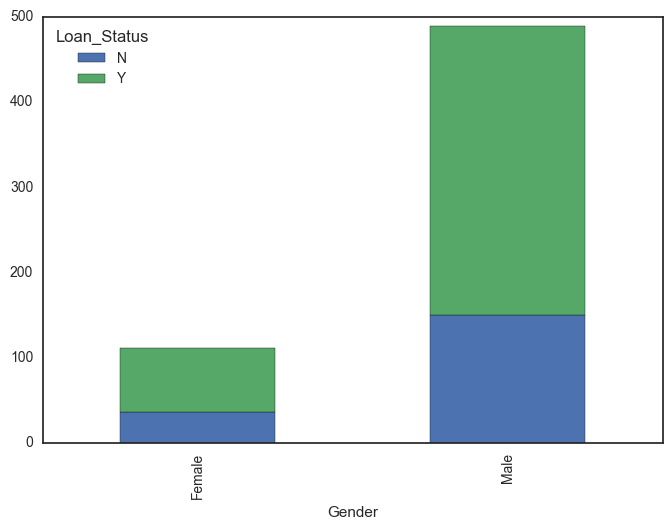

In [79]:
df=train.groupby('Gender').Loan_Status.value_counts().unstack()
df.plot(kind='bar', stacked=True)
plt.show()

In [80]:
train.groupby('Married').Loan_Status.value_counts().unstack()

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


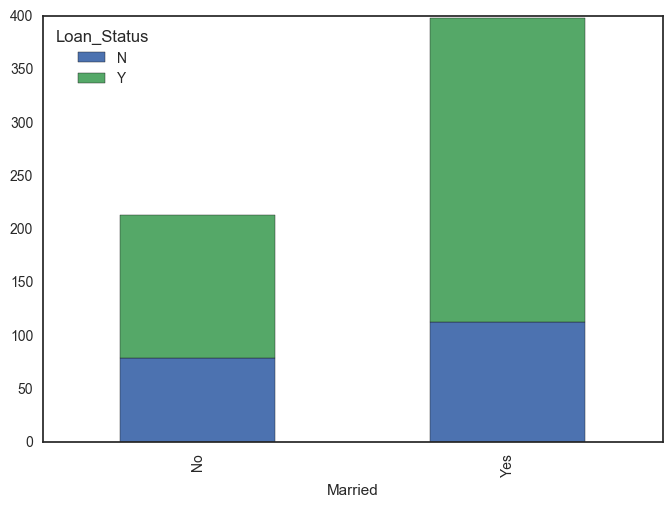

In [81]:
df=train.groupby('Married').Loan_Status.value_counts().unstack()
df.plot(kind='bar', stacked=True)
plt.show()

In [82]:
train.groupby('Dependents').Loan_Status.value_counts().unstack()

Loan_Status,N,Y
Dependents,,
0,107,238
1,36,66
2,25,76
3+,18,33


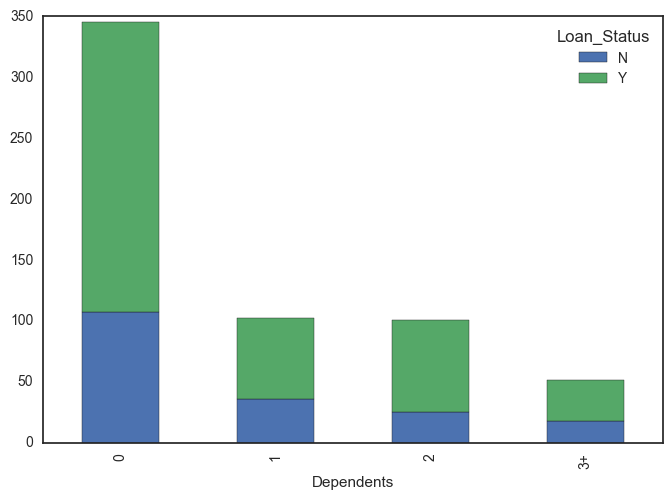

In [83]:
df=train.groupby('Dependents').Loan_Status.value_counts().unstack()
df.plot(kind='bar', stacked=True)
plt.show()

In [84]:
train.groupby('Education').Loan_Status.value_counts().unstack()

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


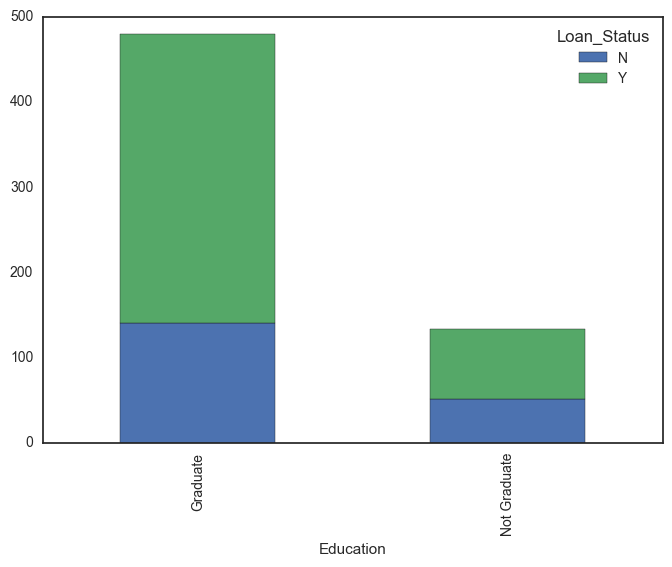

In [85]:
df=train.groupby('Education').Loan_Status.value_counts().unstack()
df.plot(kind='bar', stacked=True)
plt.show()

In [86]:
train.groupby('Self_Employed').Loan_Status.value_counts().unstack()

Loan_Status,N,Y
Self_Employed,,
No,157,343
Yes,26,56


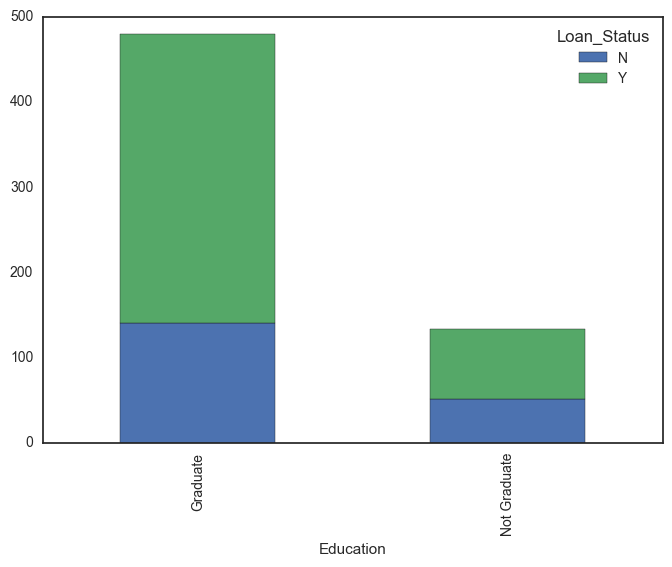

In [87]:
df=train.groupby(train.Education).Loan_Status.value_counts().unstack()
df.plot(kind='bar', stacked=True)
plt.show()

In [88]:
train.groupby(train.Credit_History).Loan_Status.value_counts().unstack()

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


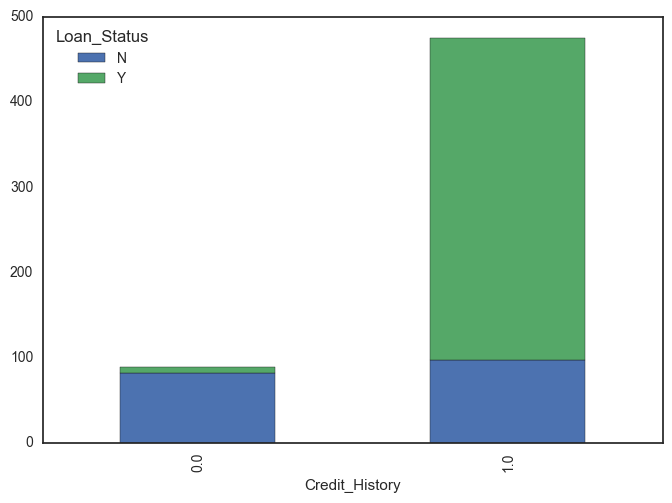

In [89]:
df=train.groupby(train.Credit_History).Loan_Status.value_counts().unstack()
df.plot(kind='bar', stacked=True)
plt.show()

In [91]:
train.groupby(train.Property_Area).Loan_Status.value_counts().unstack()

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


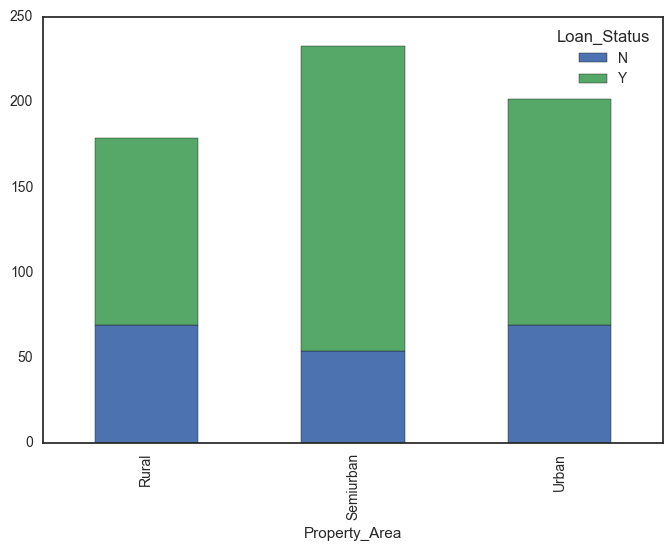

In [92]:
df=train.groupby(train.Property_Area).Loan_Status.value_counts().unstack()
df.plot(kind='bar', stacked=True)
plt.show()

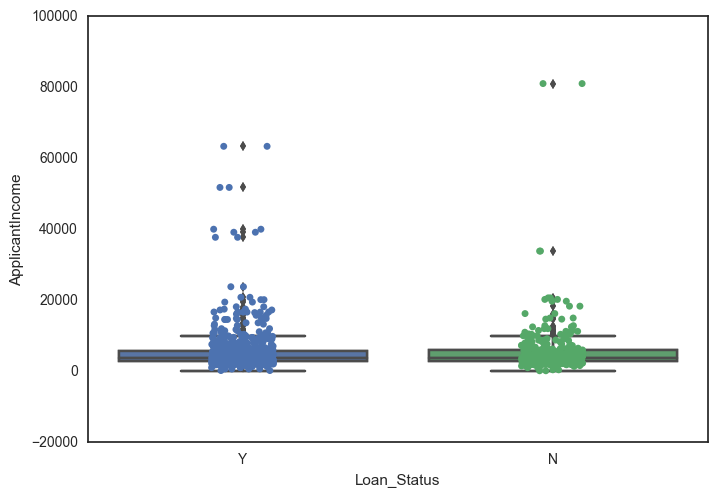

In [101]:
ax=sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=train)
sns.stripplot(x="Loan_Status", y="ApplicantIncome", data=train, jitter=True, edgecolor="gray")
plt.show()

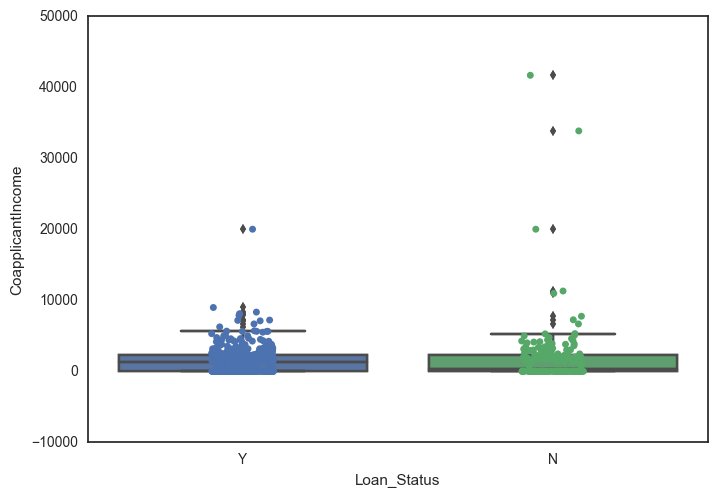

In [103]:
ax=sns.boxplot(x="Loan_Status", y="CoapplicantIncome", data=train)
sns.stripplot(x="Loan_Status", y="CoapplicantIncome", data=train, jitter=True, edgecolor="gray")
plt.show()

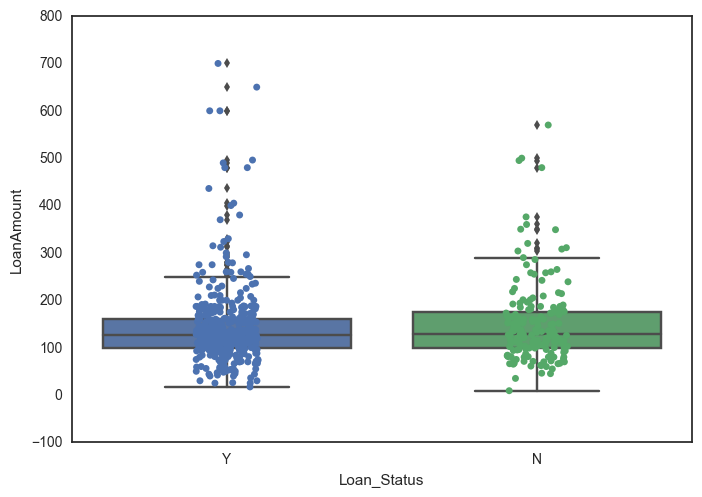

In [105]:
sns.boxplot(x="Loan_Status", y=train.LoanAmount, data=train)
sns.stripplot(x="Loan_Status", y=train.LoanAmount, data=train, jitter=True, edgecolor="gray")
plt.show()

In [107]:
def num_missing(x):
  return sum(x.isnull())

print("Missing values per column:")
print(train.apply(num_missing, axis=0))

Missing values per column:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [110]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [111]:
print("Missing values per column:")
print(train.apply(num_missing, axis=0))

Missing values per column:
Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64


In [112]:
medianLA=np.median(train.LoanAmount)
train.LoanAmount=train.LoanAmount.fillna(medianLA)
medianLA=np.median(train.Loan_Amount_Term)
train.Loan_Amount_Term=train.Loan_Amount_Term.fillna(medianLA)

In [113]:
print("Missing values per column:")
print(train.apply(num_missing, axis=0))

Missing values per column:
Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64


In [122]:
train.LoanAmount = train.LoanAmount.fillna(np.median(train[train.LoanAmount.notnull()].LoanAmount))
train.Loan_Amount_Term=train.Loan_Amount_Term.fillna(np.median(train[train.Loan_Amount_Term.notnull()].Loan_Amount_Term))

In [124]:
print("Missing values per column:")
print(train.apply(num_missing, axis=0))

Missing values per column:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
